#                <div align="center">Exercice sur le dataset des theses (PhD_3)


##                     <div align="center">MOISE EHIMIGAYE SENGHOR

## <div align="center">*UE : Manipulation et Prétraitement de données*

Importons les packages nécessaires :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import matplotlib.patches as mpatches
import sweetviz as sv
import datetime
import calendar
from math import *


Chargeons le dataset :
    

In [2]:
these = pd.read_csv("PhD_v3.csv", sep = ',', low_memory=False , encoding='utf-8')

Explorons le dataset :

In [3]:
these.head()

,Unnamed: 0,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec
0,0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,...,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",...,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN
2,2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,...,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,Medecine,male,Université de Lorraine,Français
3,3,Emmanuel Porte,NaN,Socio-histoire des politiques publiques en mat...,Gilles Pollet,Pollet Gilles,na,Lyon 2,02640334X,Science politique,...,NaN,na,s88867,non,12-07-13,12-01-16,Droit et Science Politique,male,Université Lumière - Lyon 2,NaN
4,4,Arthur Devriendt,NaN,LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...,Gabriel Dupuy,Dupuy Gabriel,na,Paris 1,27361802,Geographie,...,NaN,na,s89663,non,13-07-13,12-07-13,SHS,male,Université Paris 1 - Panthéon Sorbonne,NaN


In [4]:
these.shape

(448047, 23)

Nous avons un tres grand nombre de données et 23 variables par soucis d' efficacité nous allons choisir d' utiliser des rapports statistiques creer grace à différents packages afin de faire une analyse préparatoire et ensuite commencer le travail de fond. Nous avons le choix d' utiliser le package  sweet viz . Nous allons generer un rapport qui nous permettra d' avoir un meilleur apercu des jeu de donnée (le rapport html est en annexe).

In [6]:
rapport = sv.analyze(these)
rapport.show_html('these.html')

                                             |          | [  0%]   00:00 -> (? left)

Report rapport_these.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
these.info() # un petit recap des differentes variables de notre jeu de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  int64  
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [6]:
these = these.set_index('Unnamed: 0')#transformons cette variable en index


### 4.1 Identification des valeurs manquantes du dataset

Faisons une petit recapitulatif des valeurs manquantes du dataset, creons un tableau recapitulatif :

In [7]:
données_manquantes = pd.DataFrame(columns= ["Total données manquantes", "Pourcentage données manquantes"])
données_manquantes["Total données manquantes"] = pd.DataFrame(these.isna().sum())
données_manquantes["Pourcentage données manquantes"]= (round((these.isna().sum()/448047* 100), 1))
données_manquantes= données_manquantes.sort_values('Total données manquantes',axis=0 , ascending= False)
données_manquantes

,Total données manquantes,Pourcentage données manquantes
Date de premiere inscription en doctorat,383716,85.6
Identifiant auteur,130347,29.1
Langue_rec,64120,14.3
Year,57086,12.7
Date de soutenance,57086,12.7
Identifiant etablissement,17082,3.8
etablissement_rec,3074,0.7
Mise a jour dans theses.fr,177,0.0
Directeur de these (nom prenom),13,0.0
Directeur de these,13,0.0


Afin d' affiner notre travail nous allons selectionner les variables ayant plus d' 1% de données manquantes.

In [8]:
d = données_manquantes[données_manquantes["Pourcentage données manquantes"]>1]
d

,Total données manquantes,Pourcentage données manquantes
Date de premiere inscription en doctorat,383716,85.6
Identifiant auteur,130347,29.1
Langue_rec,64120,14.3
Year,57086,12.7
Date de soutenance,57086,12.7
Identifiant etablissement,17082,3.8


- réalisez des graphiques pour représenter la répartition des données manquantes au sein du jeu de données. 


Creons une dataset des variables retenues.

In [9]:
t = these[["Date de premiere inscription en doctorat","Identifiant auteur","Langue_rec","Year", "Date de soutenance","Identifiant etablissement"]]

Faisons d' abord une matrice de valeur manquantes.

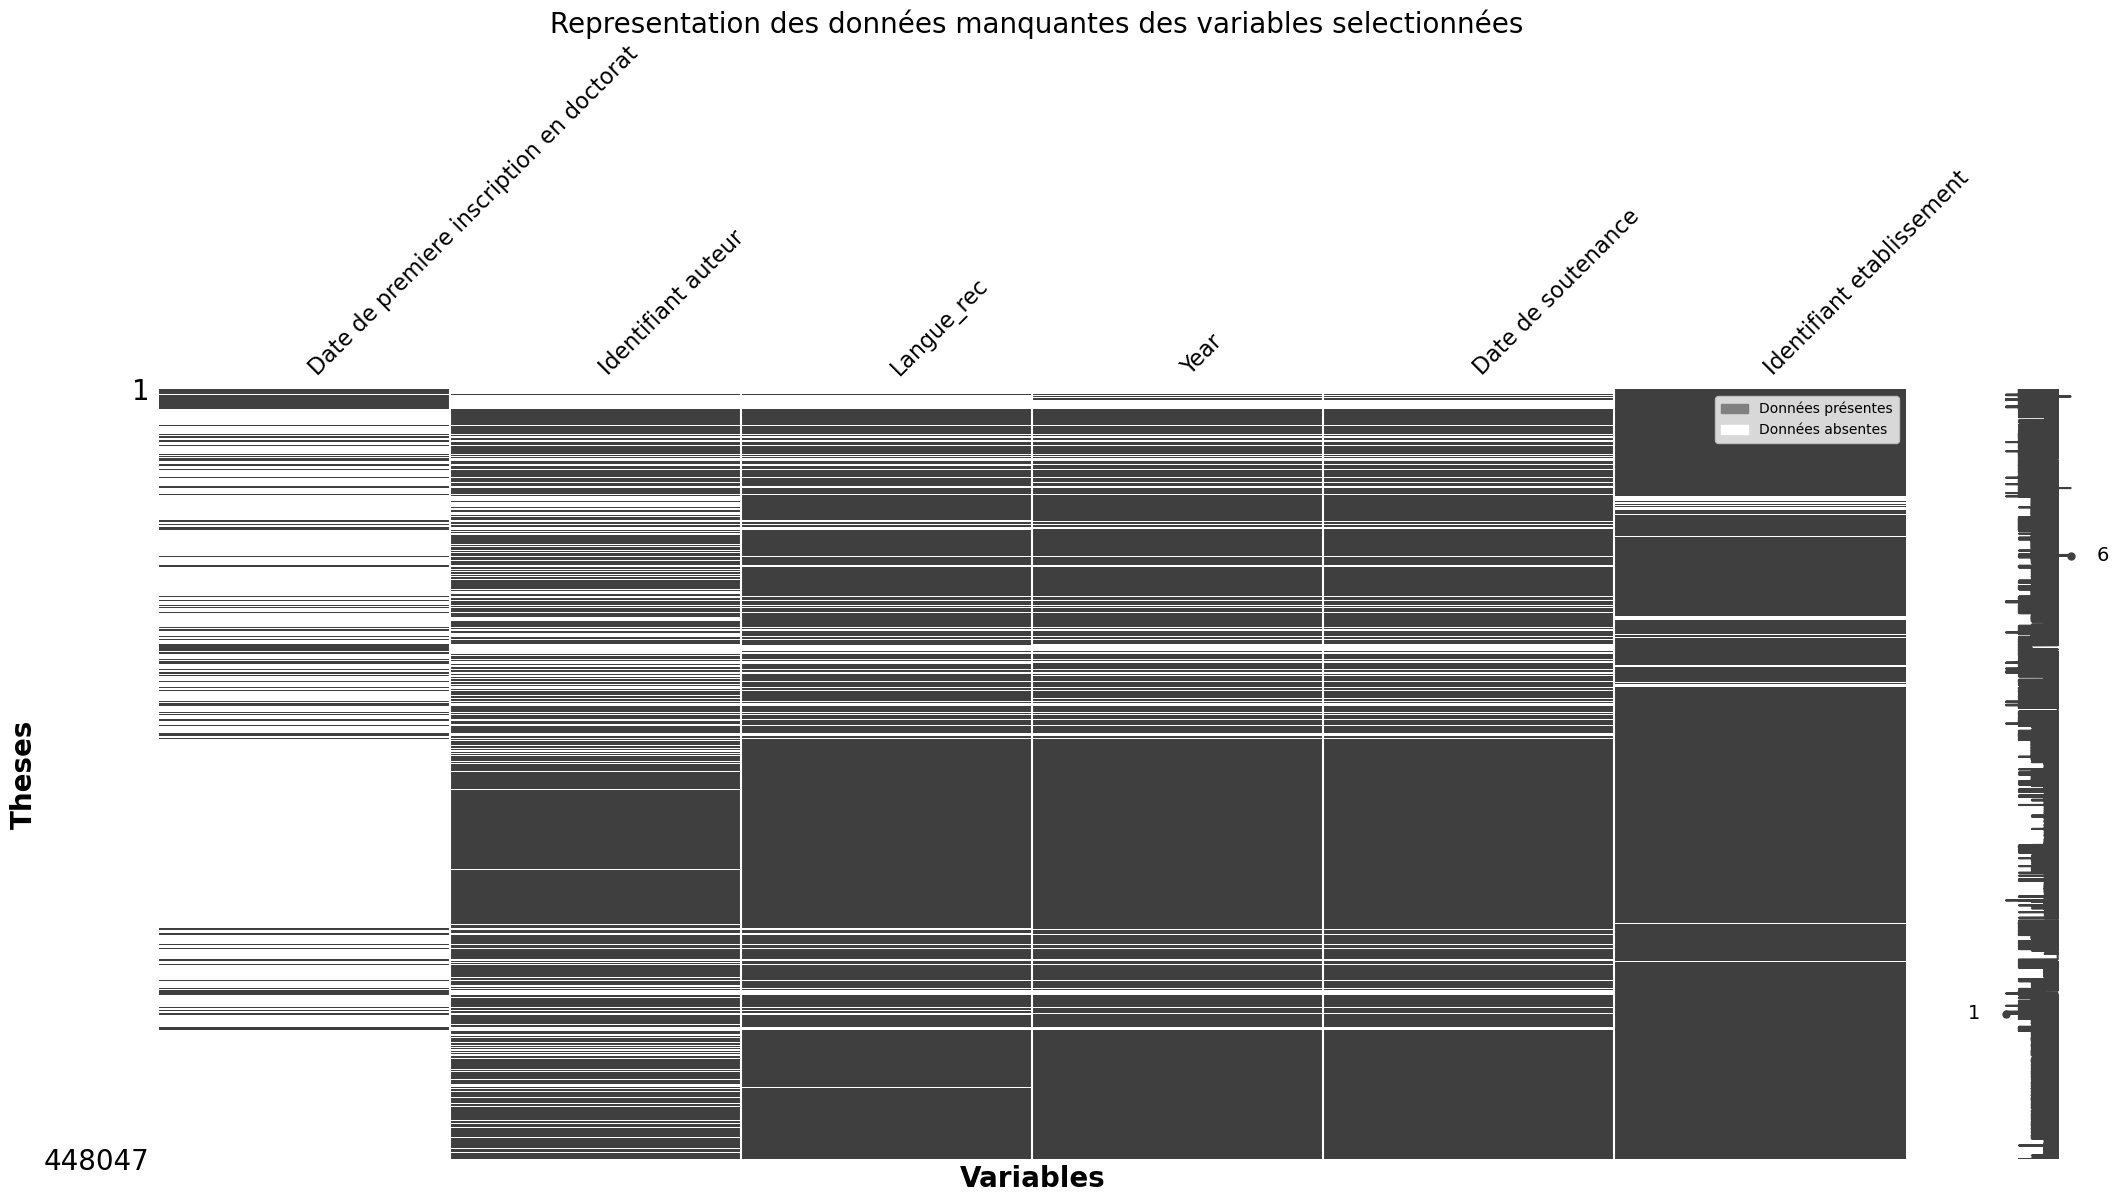

In [10]:

graph = msno.matrix(t)
graph.set_ylabel(  "Theses", fontsize=20 ,fontweight='bold')
graph.set_xlabel( 'Variables',fontsize=20, fontweight='bold' )
gray_patch = mpatches.Patch(color='grey', label= 'Données présentes')
white_patch = mpatches.Patch(color='white', label='Données absentes ')
plt.legend(handles=[gray_patch, white_patch])
plt.title(' Representation des données manquantes des variables selectionnées',fontsize=20)
plt.show()

Faisons une carte graphique dependant du pourcentage de valeurs manquantes et fonction du statuts des theses

In [11]:
t1 = these[["Date de premiere inscription en doctorat","Identifiant auteur","Langue_rec","Year", "Date de soutenance","Identifiant etablissement","Statut"]]
#Creons le dataset que nous allons utiliser avec les variables retenues et la variable Statut

Text(0.5, 1.0, ' Pourcentage de données manquantes en fonction du statut des theses')

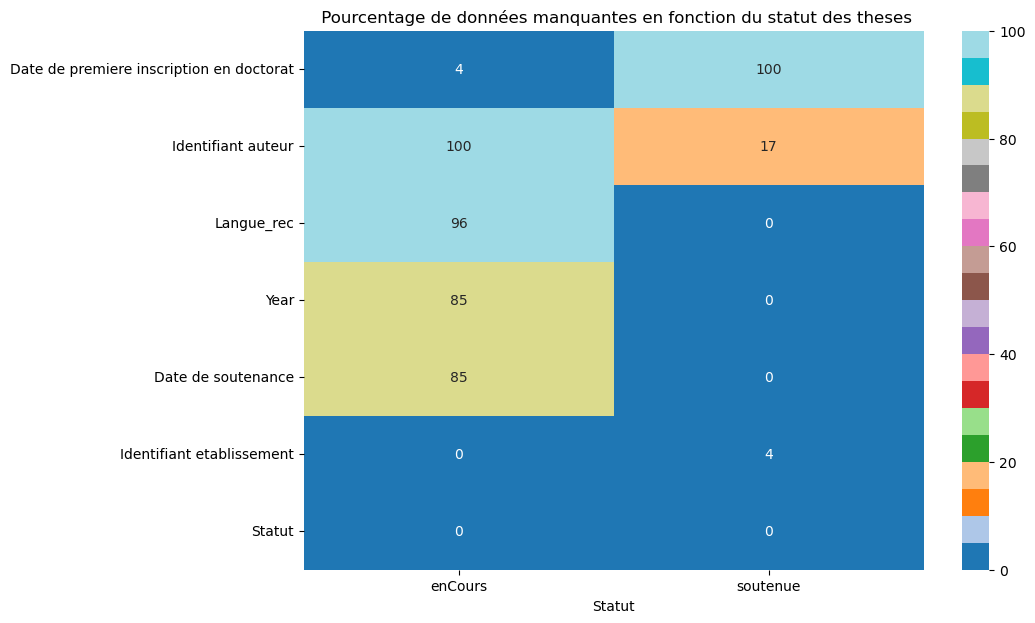

In [12]:
percent_manq = round(t1.isnull().groupby(t1['Statut']).mean() * 100, 1)#pourcentage de valeur manquantes en fonction du statut.
plt.figure(figsize=(10, 7))
sns.heatmap(percent_manq.transpose(), annot = True, fmt='.0f',vmin= 0, vmax=100, cmap = "tab20" )
plt.title(' Pourcentage de données manquantes en fonction du statut des theses')

###  4.2 Detection des problemes dans les données

- faisons une illustration du nombre de soutenance par mois 

In [13]:
these["Date"] =  pd.to_datetime(these['Date de soutenance'])#changeons le format de la colonne date de soutenance dans une nouvelle colonne date

In [14]:
these["Date"].head()#verification

Unnamed: 0
0          NaT
1          NaT
2   1993-01-01
3          NaT
4          NaT
Name: Date, dtype: datetime64[ns]

In [15]:
#Creons des colonnes jour, mois et Year de la colonne date
these["Mois"]= these["Date"].dt.month
these["Year"]= these["Date"].dt.year
these["jour"]= these["Date"].dt.day


In [16]:
#creons un dataframe qui prends en compte les données de 1984 à 2018
these84_18 = these[(these.Year > 1983) & (these.Year<2019)]
these84_18["Mois"].value_counts().sort_index(ascending=True)

1.0     286770
2.0       4411
3.0       6037
4.0       4880
5.0       6120
6.0       9236
7.0       4605
8.0       3496
9.0      11625
10.0     10073
11.0     15299
12.0     16611
Name: Mois, dtype: int64

In [17]:
#Creons un dataframe mois en lettre et distribution des mois
t = pd.DataFrame(these84_18["Mois"].value_counts().sort_index(ascending=True))
t["mois_en_lettre"] = ['jan',"fev","mars","avril", "mai", "juin", "jui", "aout","sept","oct" ,"nov", "dec"]
t

,Mois,mois_en_lettre
1.0,286770,jan
2.0,4411,fev
3.0,6037,mars
4.0,4880,avril
5.0,6120,mai
6.0,9236,juin
7.0,4605,jui
8.0,3496,aout
9.0,11625,sept
10.0,10073,oct


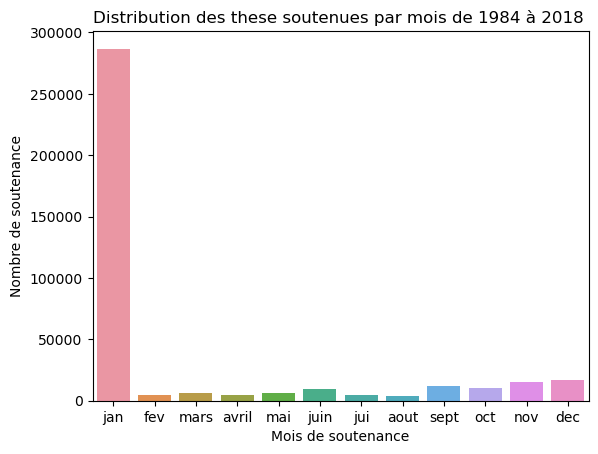

In [18]:
#faisons la visualisation  en ordonnant les mois 
ordre_mois= ['jan',"fev","mars","avril", "mai", "juin", "juil", "aout","sept","oct", "nov", "dec"]
sns.barplot(y="Mois", x ="mois_en_lettre" , data=t) 
plt.xlabel('Mois de soutenance') 
plt.ylabel('Nombre de soutenance')
plt.title("Distribution des these soutenues par mois de 1984 à 2018 ")

plt.show() 

- Distribution du nombre de these soutenue par mois année de chaque année de 2005 à 2018

In [19]:
these05_18 = these[(these.Year > 2004) & (these.Year<2019)] # Creons un le dataframe en filtrant les données de these de 2004 à 2018
these05_18= pd.DataFrame(these05_18.groupby(["Year","Mois"])["Year"].count())# Regroupons les données par années et par mois et trions le tout par année

In [20]:
these05_18 =these05_18.rename(columns={'Year': 'nombre de theses'})#Pour eviter les erreur et faciliter la creation des visualisation

In [21]:
these05_18 = these05_18.reset_index()#pour reintegrer les index en colonnes du dataframe 
these05_18["Year"]= these05_18["Year"].astype(int)#Pour eviter d' avoir des floats dans nos titres 
these05_18["Mois"]= these05_18["Mois"].astype(int)


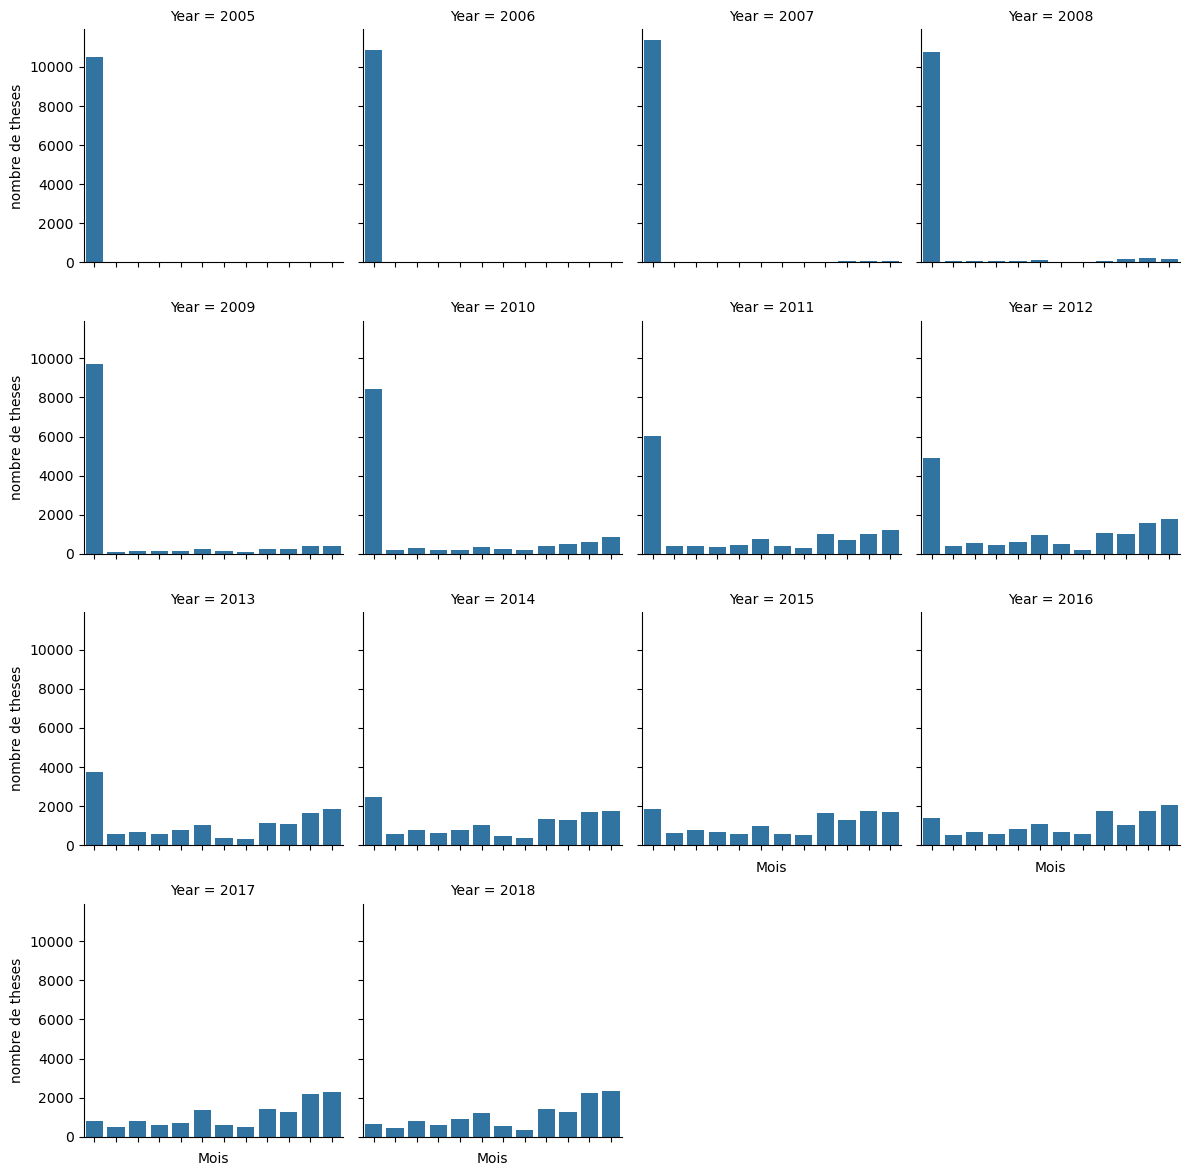

In [22]:
#Creons les visualisations
 
graph = sns.FacetGrid(these05_18, col="Year", col_wrap=4, margin_titles=True)
graph.map(sns.barplot, "Mois", "nombre de theses", order = [1,2,3,4,5,6,7,8,9,10,11,12])
graph.set_xticklabels([])# je n' arrivais pas à avoir les labels des axes abscisses des subplotes j' ai choisi de les supprimer pour harmoniser le graphique

- Distribution du nombre de these soutenue par mois année par année de 2005 à 2018 en pourcentage

In [23]:
tota =pd.DataFrame(these05_18["nombre de theses"].groupby(these05_18["Year"]).sum())
tota = tota.reset_index()
data = pd.merge(these05_18,tota, how= "inner", on = "Year")
data.rename(columns = {'nombre de theses_x':'nombre de these_mensuel', 'nombre de theses_y':'nombre de these_annuel'}, inplace = True)
data["pourcentage"]= round((data["nombre de these_mensuel"]/data["nombre de these_annuel"])* 100, 1)
data


,Year,Mois,nombre de these_mensuel,nombre de these_annuel,pourcentage
0,2005,1,10526,10562,99.7
1,2005,2,1,10562,0.0
2,2005,3,2,10562,0.0
3,2005,4,1,10562,0.0
4,2005,5,2,10562,0.0
...,...,...,...,...,...
163,2018,8,336,12805,2.6
164,2018,9,1432,12805,11.2
165,2018,10,1270,12805,9.9
166,2018,11,2229,12805,17.4


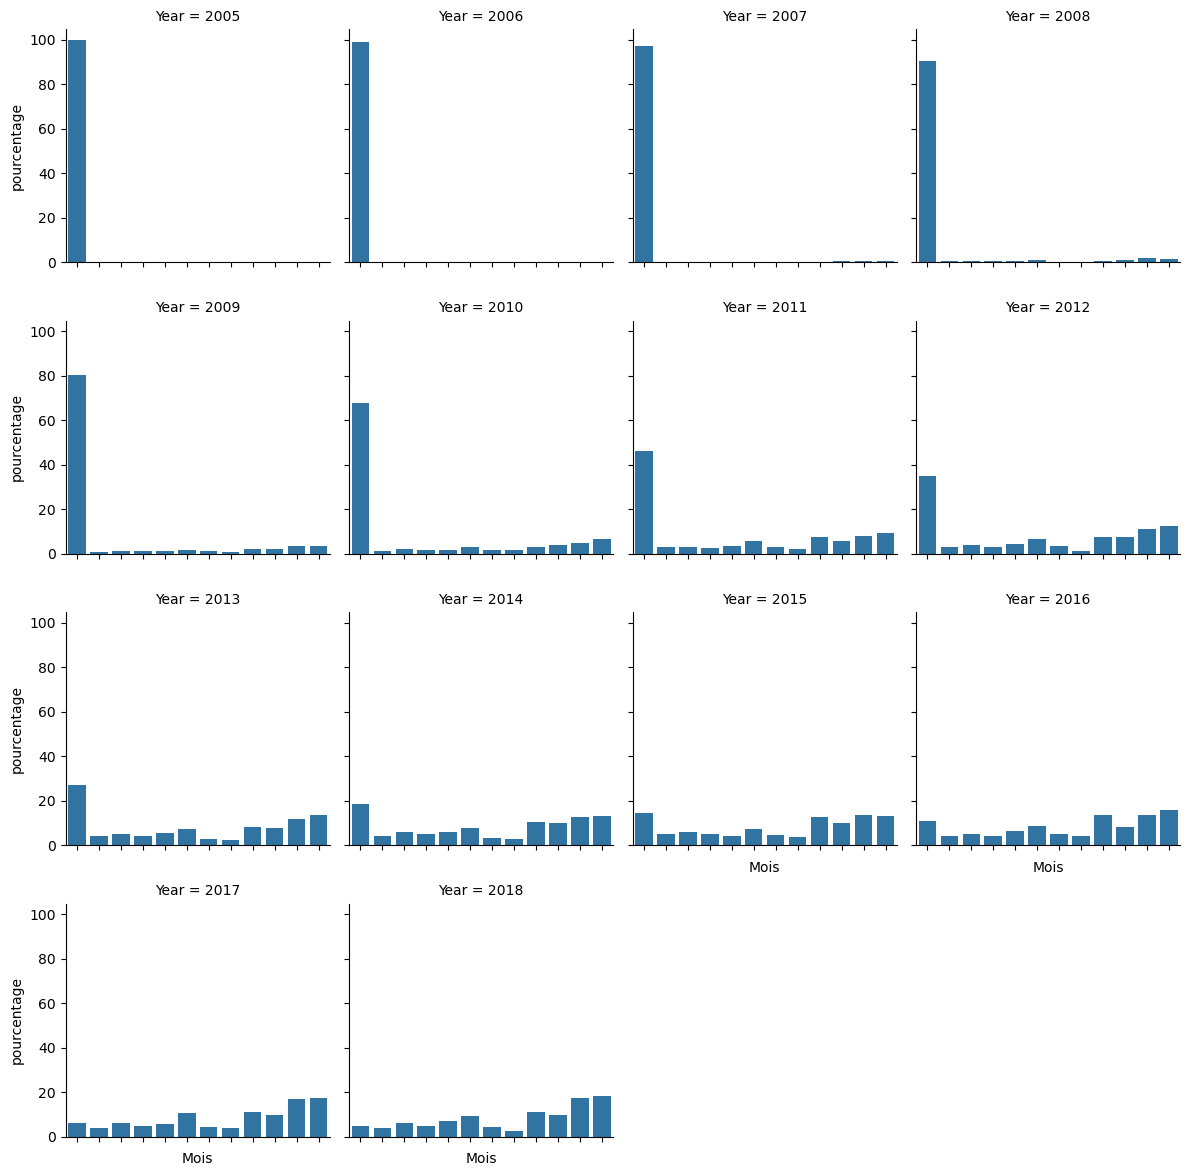

In [24]:
#Creons les visualisations
gg = sns.FacetGrid(data, col="Year", col_wrap=4, margin_titles=True)
gg.map(sns.barplot, "Mois", "pourcentage", order = [1,2,3,4,5,6,7,8,9,10,11,12])
gg.set_xticklabels([])# je n' arrivais pas à avoir les labels des axes abscisses des subplotes j' ai choisi de les supprimer pour harmoniser le graphique

- Representons le pourcentage total de these soutenue par mois de 2005 à 2018

In [25]:
these05_18bis = these[(these.Year > 2004) & (these.Year<2019)]
data1 =these05_18bis.groupby(["Mois"])["Year"].count()
data1 = data1.reset_index()                        
data1["Mois"] = round(data1["Mois"],0)# Affichage
data1
data1.rename(columns = {'Year':'nombre de theses'}, inplace = True)
data1["pourcentag_mensuel"]= round((data1["nombre de theses"] / data1['nombre de theses'].sum())*100,1)#calcul du pourcentage mensuel
data1["Mois"]= data["Mois"].astype(int)
data1["nombre de theses"]= data1["nombre de theses"].astype(int)

data1["mois_en_lettre"] = ['jan',"fev","mars","avril", "mai", "juin", "jui", "aout","sept","oct" ,"nov", "dec"]#pour faciliter la visualiation
data1

,Mois,nombre de theses,pourcentag_mensuel,mois_en_lettre
0,1,83559,47.5,jan
1,2,4404,2.5,fev
2,3,6025,3.4,mars
3,4,4872,2.8,avril
4,5,6106,3.5,mai
5,6,9218,5.2,juin
6,7,4593,2.6,jui
7,8,3489,2.0,aout
8,9,11603,6.6,sept
9,10,10060,5.7,oct


In [26]:
#Calcul erreur type
from math import *
erreur_type = round(data1["pourcentag_mensuel"].std()/sqrt(12),1)


Text(0, 0.5, 'Pourcentage')

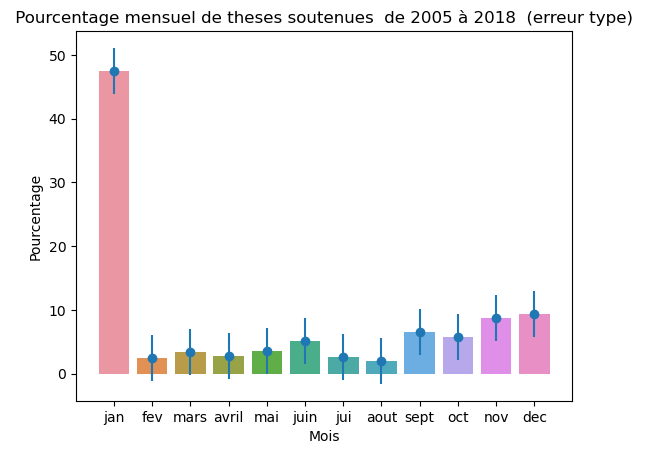

In [27]:
#Creons les visualisations
sns.barplot(x="mois_en_lettre", y ="pourcentag_mensuel",data = data1).set (title=' Pourcentage mensuel de theses soutenues  de 2005 à 2018  (erreur type) ')
plt.errorbar(x=data1["mois_en_lettre"], y=data1["pourcentag_mensuel"],yerr = erreur_type,fmt ='o')
plt.xlabel('Mois')
plt.ylabel('Pourcentage')


- Faisons la meme chose sur l' ensemble du dataset

In [28]:
data2 =these.groupby(["Mois"])["Year"].count()
data2 = data2.reset_index()                        
data2["Mois"] = round(data2["Mois"],0)
data2.rename(columns = {'Year':'t_mensuel'}, inplace = True)
data2["pourcentag_mensuel"]= round((data2["t_mensuel"] / data2['t_mensuel'].sum())*100,1)
data2["Mois"]= data2["Mois"].astype(int)
data2["t_mensuel"]= data2["t_mensuel"].astype(int)

data2["mois_en_lettre"] = ['jan',"fev","mars","avril", "mai", "juin", "jui", "aout","sept","oct" ,"nov", "dec"]
erreur_type2 = round(data2["pourcentag_mensuel"].std()/sqrt(12),1)


Text(0, 0.5, 'Pourcentage')

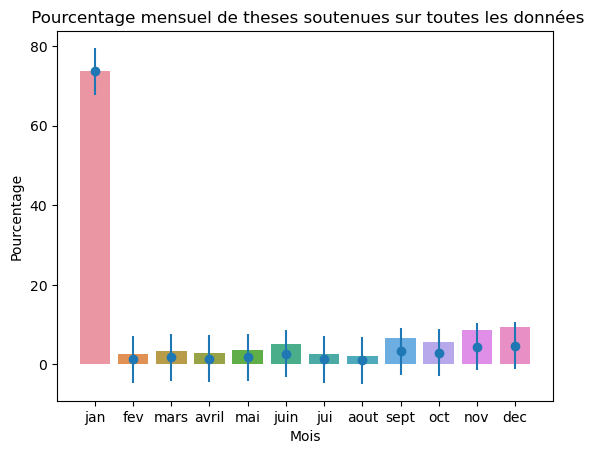

In [29]:
#Creons les visualisations
sns.barplot(x="mois_en_lettre", y ="pourcentag_mensuel",data = data1).set (title=' Pourcentage mensuel de theses soutenues sur toutes les données')
sns.barplot(x="mois_en_lettre", y ="pourcentag_mensuel",data = data2)
plt.errorbar(x=data2["mois_en_lettre"], y=data2["pourcentag_mensuel"],yerr = erreur_type2,fmt ='o')
plt.xlabel('Mois')
plt.ylabel('Pourcentage')

- Faison une visualisation des these soutenues au premier janvier sur tout le dataset

In [30]:
data3 = these[(these["Mois"] == 1.0) & (these["jour"] == 1.0)] # creons un dataset en triant les theses soutenues le premier janvier

In [31]:
#Creons un dataframe intermediaire pour nous faciliter le travil
prop1janvier =pd.DataFrame(data3.groupby(["Year"])["Year"].count())#agregeons les soutenances du premiers janvier par an
prop1janvier.rename(columns = {'Year':'t_1janv'}, inplace = True)
prop1janvier["t_année"]= these.groupby(["Year"])["Year"].count()#agregeons l' integralité des soutenances annuelles
prop1janvier["percent"]= round(prop1janvier["t_1janv"]/prop1janvier["t_année"],1)*100#Pourcentage
#avant 1084  un these par an apres 2018 valeur d'année abberantes nous choisis d' elaguer ces données
prop1janvier = prop1janvier.reset_index()

prop1janvier = prop1janvier[(prop1janvier["Year"]  > 1983) & (prop1janvier["Year"] < 2019)] #reindexations sans les outliers

prop1janvier

,Year,t_1janv,t_année,percent
4,1984.0,6,6,100.0
5,1985.0,3007,3007,100.0
6,1986.0,5162,5162,100.0
7,1987.0,8439,8439,100.0
8,1988.0,11045,11045,100.0
9,1989.0,11102,11102,100.0
10,1990.0,11011,11011,100.0
11,1991.0,10831,10831,100.0
12,1992.0,12065,12065,100.0
13,1993.0,12309,12309,100.0


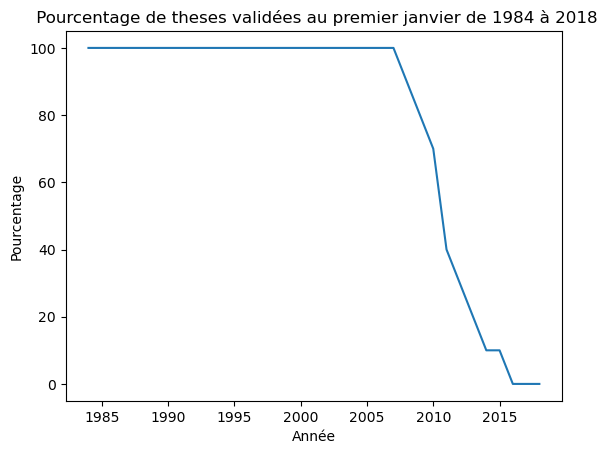

In [32]:
#La visualisation
sns.lineplot(x="Year", y="percent", data=prop1janvier).set(title = " Pourcentage de theses validées au premier janvier de 1984 à 2018")
plt.ylabel('Pourcentage')
plt.xlabel('Année')

plt.show()

- Representons le pourcentage de soutenance par mois en enlevant le premier janvier 

In [33]:
these05_18ter = these[(these.Year > 2004) & (these.Year<2019)]#Indexons les années
data4 = these05_18ter.groupby(["Mois", "jour"]).size().reset_index(name='total')#regroupons les donnees par mois et année
data4 = data4.drop(index=0)#supprimons les donnees des premiers janvier
data44 = data4.groupby("Mois").sum()#regroupons les données par mois
data44["percent"]=round((data44["total"] / data44['total'].sum())*100,1)#calculons le pourcentage par mois
data44["mois_en_lettre"] = ["jan","fev","mars","avril", "mai", "juin", "jui", "aout","sept","oct" ,"nov", "dec"]

data44

,jour,total,percent,mois_en_lettre
Mois,,,,
1.0,495.0,5749,5.9,jan
2.0,435.0,4404,4.5,fev
3.0,496.0,6025,6.2,mars
4.0,465.0,4872,5.0,avril
5.0,496.0,6106,6.2,mai
6.0,465.0,9218,9.4,juin
7.0,496.0,4593,4.7,jui
8.0,496.0,3489,3.6,aout
9.0,465.0,11603,11.8,sept


Text(0.5, 0, 'Mois')

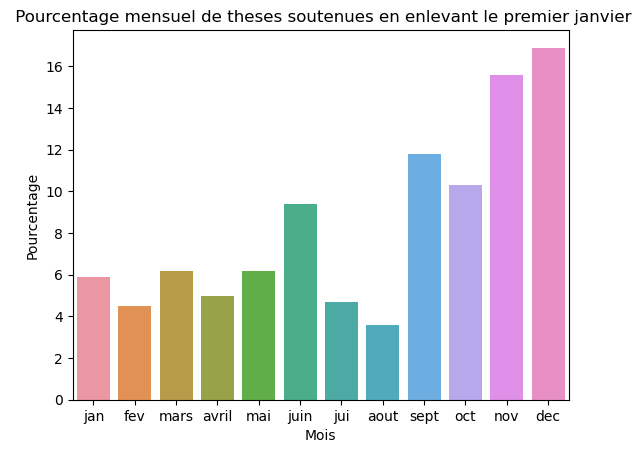

In [34]:
#La visualisation
sns.barplot(x="mois_en_lettre", y ="percent",data = data44).set(title =" Pourcentage mensuel de theses soutenues en enlevant le premier janvier")
plt.ylabel('Pourcentage')
plt.xlabel('Mois')

- Enquete Cecile Martin

In [35]:
these["Auteur"]=these["Auteur"].str.upper()#Transformons la colonne Auteur en majuscule pour éviter la casse
enquete = these[these["Auteur"]== "CECILE MARTIN"]
enquete

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec,Date,Mois,jour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
61310,CECILE MARTIN,203208145,L'invention de l'ecran. De l'ecran de cheminee...,Laurent Jullier,Jullier Laurent,34210393,Sorbonne Paris Cite,19077990X,Etudes cinematographiques et audiovisuelles,soutenue,...,non,26-09-11,03-10-17,SHS,female,USPC,Français,2017-01-16,1.0,16.0
167180,CECILE MARTIN,81323557,Systeme laitier et filiere lait au mexique : c...,JEAN LOSSOUARN,LOSSOUARN JEAN,na,Institut national agronomique Paris-Grignon,26387859,Sciences biologiques fondamentales et applique...,soutenue,...,non,08-07-17,10-12-19,Biologie,female,AgroParisTech,Français,2000-01-01,1.0,1.0
267945,CECILE MARTIN,179423568,"Concurrence, prix et qualite de la prise en ch...",Brigitte Dormont,Dormont Brigitte,29736889,Paris 9,27787109,Sciences economiques,soutenue,...,oui,26-09-11,05-12-17,Economie Gestion,female,Université Paris sciences et lettres,Français,2014-01-24,1.0,24.0
410631,CECILE MARTIN,81323557,Modelisation et criteres de combustibilite en ...,Gerard Antonini,Antonini Gerard,32192800,Compiegne,26570564,Genie des procedes industriels,soutenue,...,non,24-05-13,08-07-20,Science de l'ingÃ©nieur,female,Université de technologie de Compiègne,Français,2001-01-01,1.0,1.0
415174,CECILE MARTIN,81323557,Caracterisation electrophysiologique et pharma...,Jean Mironneau,Mironneau Jean,95278966,Bordeaux 2,26403005,Neurosciences,soutenue,...,non,24-05-13,07-07-20,Biologie,female,Université de Bordeaux,Français,1991-01-01,1.0,1.0
426754,CECILE MARTIN,81323557,Influence du ph ruminal sur la digestion des p...,Yves Briand,Briand Yves,91232910,Clermont-Ferrand 2,26403102,Sciences biologiques et fondamentales applique...,soutenue,...,non,24-05-13,07-07-20,Psychologie,female,Université Clermont Auvergne,Français,1994-01-01,1.0,1.0
432473,CECILE MARTIN,182118703,Deposition d'energie par production de paires ...,Dominique Vautherin,Vautherin Dominique,32731965,Paris 11,26404664,Physique,soutenue,...,non,26-09-11,07-07-20,"Materiaux, Milieux et Chimie",female,Université Paris-Saclay,Bilingue,1989-01-01,1.0,1.0


In [36]:
#extraction des variables qui nous semblent opportunnes
enquete.columns

Index(['Auteur', 'Identifiant auteur', 'Titre', 'Directeur de these',
       'Directeur de these (nom prenom)', 'Identifiant directeur',
       'Etablissement de soutenance', 'Identifiant etablissement',
       'Discipline', 'Statut', 'Date de premiere inscription en doctorat',
       'Date de soutenance', 'Year', 'Langue de la these',
       'Identifiant de la these', 'Accessible en ligne',
       'Publication dans theses.fr', 'Mise a jour dans theses.fr',
       'Discipline_prÃ©di', 'Genre', 'etablissement_rec', 'Langue_rec', 'Date',
       'Mois', 'jour'],
      dtype='object')

In [37]:
col=['Auteur','Identifiant auteur','Titre','Etablissement de soutenance','Date de soutenance','Identifiant de la these','Discipline_prÃ©di','Genre']

In [38]:
#Nettoyons pour une meilleure utilisation
enquete = enquete[col]
enquete.rename(columns = { 'Discipline_prÃ©di':'Discipline'}, inplace = True)
enquete["Discipline"]=enquete["Discipline"].str.upper()
enquete

C:\Users\toshiba\AppData\Local\Temp\ipykernel_5040\558070881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enquete.rename(columns = { 'Discipline_prÃ©di':'Discipline'}, inplace = True)
C:\Users\toshiba\AppData\Local\Temp\ipykernel_5040\558070881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enquete["Discipline"]=enquete["Discipline"].str.upper()


,Auteur,Identifiant auteur,Titre,Etablissement de soutenance,Date de soutenance,Identifiant de la these,Discipline,Genre
Unnamed: 0,,,,,,,,
61310,CECILE MARTIN,203208145,L'invention de l'ecran. De l'ecran de cheminee...,Sorbonne Paris Cite,16-01-17,2017USPCA018,SHS,female
167180,CECILE MARTIN,81323557,Systeme laitier et filiere lait au mexique : c...,Institut national agronomique Paris-Grignon,01-01-00,2000INAP0034,BIOLOGIE,female
267945,CECILE MARTIN,179423568,"Concurrence, prix et qualite de la prise en ch...",Paris 9,24-01-14,2014PA090003,ECONOMIE GESTION,female
410631,CECILE MARTIN,81323557,Modelisation et criteres de combustibilite en ...,Compiegne,01-01-01,2001COMP1380,SCIENCE DE L'INGÃ©NIEUR,female
415174,CECILE MARTIN,81323557,Caracterisation electrophysiologique et pharma...,Bordeaux 2,01-01-91,1991BOR22005,BIOLOGIE,female
426754,CECILE MARTIN,81323557,Influence du ph ruminal sur la digestion des p...,Clermont-Ferrand 2,01-01-94,1994CLF21651,PSYCHOLOGIE,female
432473,CECILE MARTIN,182118703,Deposition d'energie par production de paires ...,Paris 11,01-01-89,1989PA112163,"MATERIAUX, MILIEUX ET CHIMIE",female


### 4.3 Détection d’outliers

- Creons le dataset demander avec les Directeurs de theses

In [39]:
T = these[(these.Year > 1983) & (these.Year<2019)] #indexation 
enquete1= T.groupby(['Directeur de these']).size().reset_index(name='total theses').sort_values("total theses", ascending = False) #regroupons les donnees par mois et année
enquete1.head(10)

,Directeur de these,total theses
30886,Directeur de these inconnu,711
69437,Jean-Michel Scherrmann,208
42241,Francois-Paul Blanc,201
107283,Pierre Brunel,195
88698,Michel Bertucat,173
51021,Guy Pujolle,172
14006,Bernard Teyssie,138
53168,Henry de Lumley,132
63585,Jean-Claude Chaumeil,131
15653,Bruno Foucart,130


In [40]:
#Analysons la distribution
per = [0.7,0.8, 0.9] 
enquete1.describe(percentiles= per)

,total theses
count,129089.000000
mean,2.937129
std,5.552783
min,1.000000
50%,1.000000
70%,2.000000
80%,3.000000
90%,7.000000
max,711.000000


- Nous allons enqueter sur le directeur de these le plus prolifique (Jean-Michel Scherrmann)

Text(0.5, 1.0, ' Representation des données manquantes pour les theses dirigées par le professeur Scherman(1984-2018)')

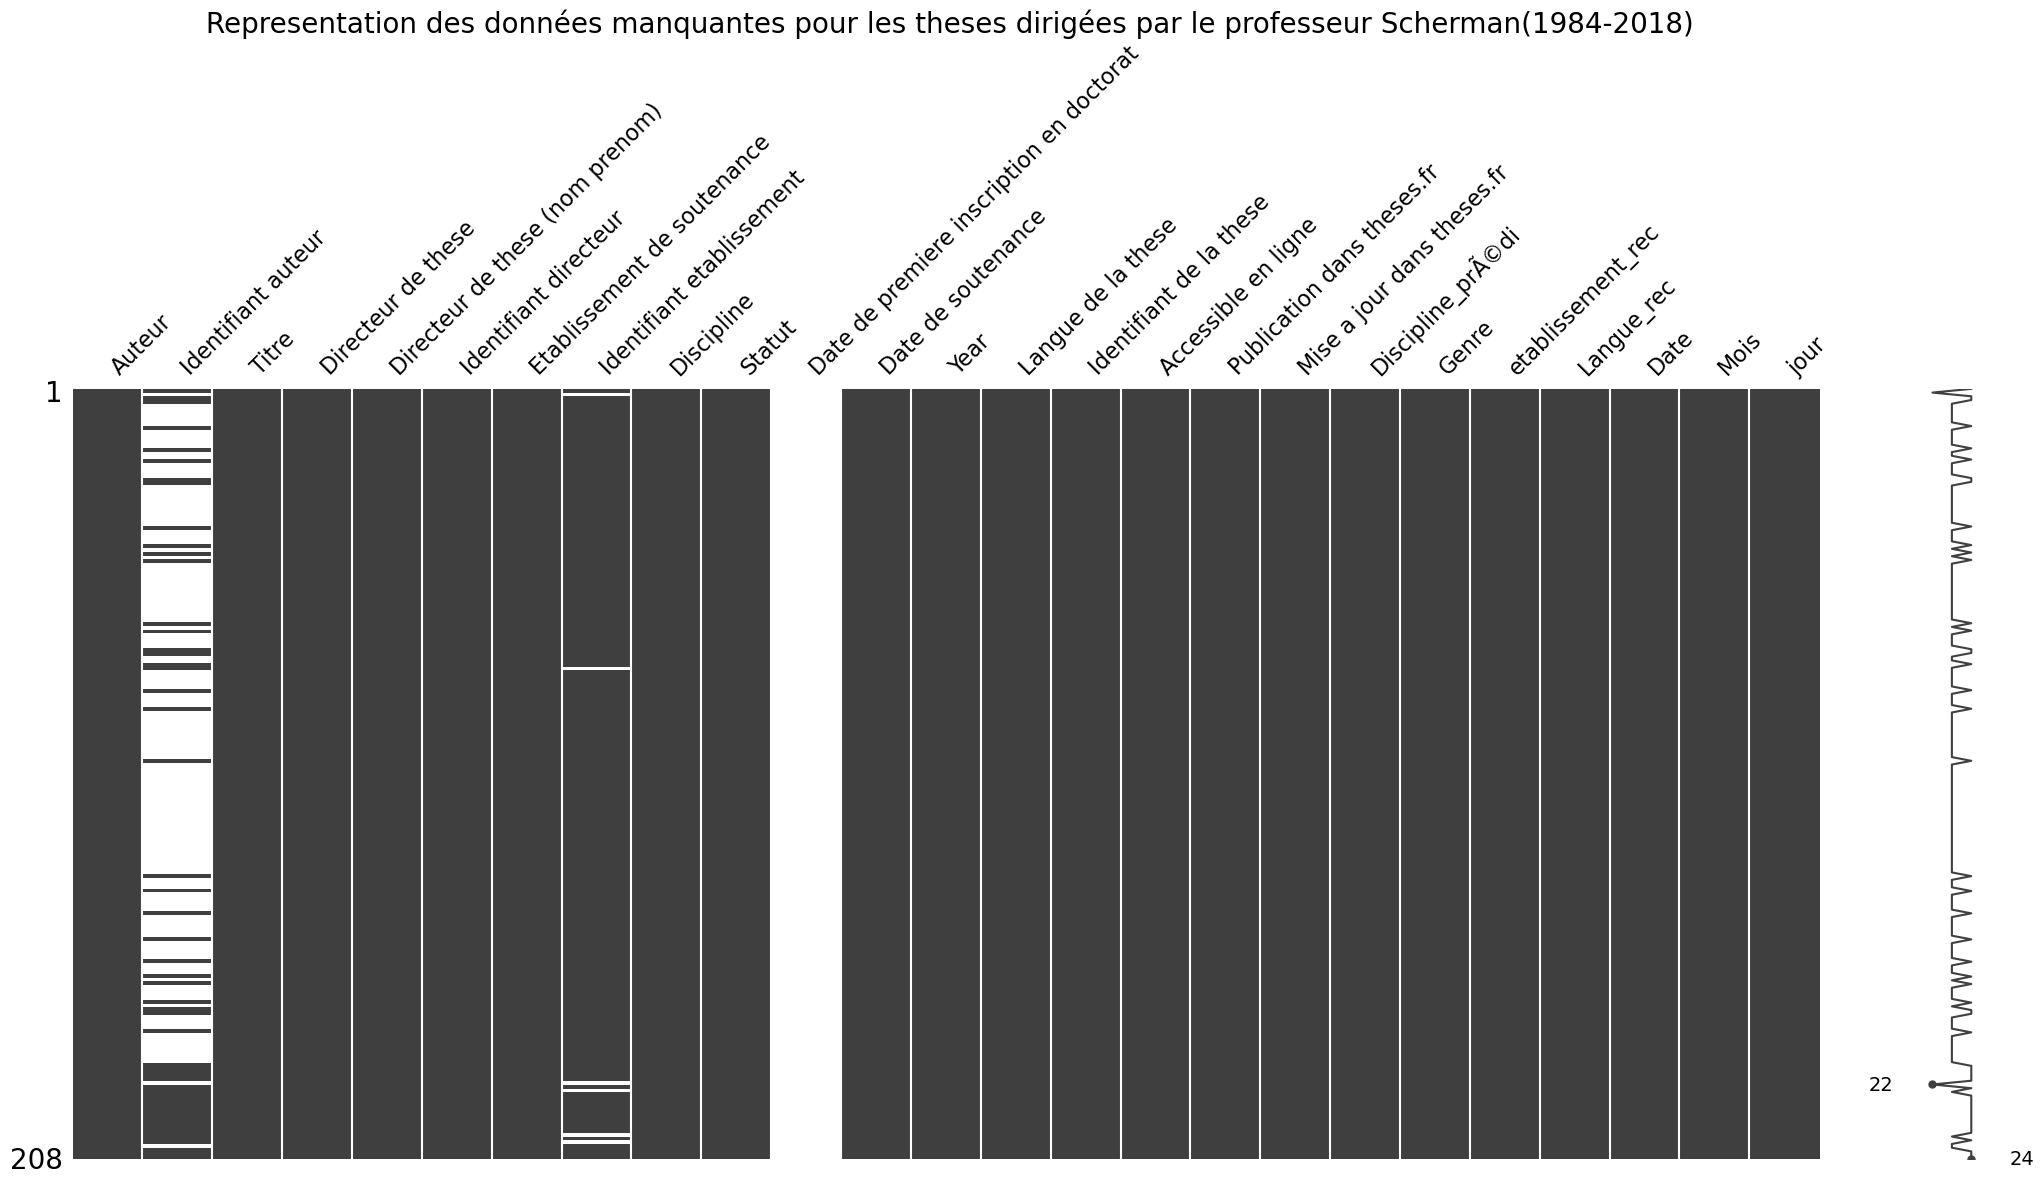

In [41]:
enquete2 = T[T['Directeur de these']== 'Jean-Michel Scherrmann']
msno.matrix(enquete2)
plt.title(' Representation des données manquantes pour les theses dirigées par le professeur Scherman(1984-2018)',fontsize =20)


In [42]:
#faisons une extraction des variables qui nous semblent significatives
enquete2.groupby(['Identifiant etablissement','Year','Etablissement de soutenance', 'Identifiant directeur','Discipline']).size().reset_index(name='total theses') #regroupons les variables pertinentes
#parcours du professeur

,Identifiant etablissement,Year,Etablissement de soutenance,Identifiant directeur,Discipline,total theses
0,26404788,1989.0,Paris 5,59375140,Pharmacie,11
1,26404788,1990.0,Paris 5,59375140,Pharmacie,13
2,26404788,1991.0,Paris 5,59375140,Pharmacie,11
3,26404788,1992.0,Paris 5,59375140,Pharmacie,22
4,26404788,1993.0,Paris 5,59375140,Pharmacie,27
5,26404788,1994.0,Paris 5,59375140,Pharmacie,39
6,26404788,1995.0,Paris 5,59375140,Medecine,1
7,26404788,1995.0,Paris 5,59375140,Pharmacie,26
8,26404788,1996.0,Paris 5,59375140,Medecine,1
9,26404788,1996.0,Paris 5,59375140,Pharmacie,23


In [43]:
#groupons par université
E= enquete2.groupby(['Identifiant etablissement','Year','Etablissement de soutenance', 'Identifiant directeur','Discipline']).size().reset_index(name='total theses') #regroupons les variables pertinentes
E.groupby(['Etablissement de soutenance']).sum()

C:\Users\toshiba\AppData\Local\Temp\ipykernel_5040\2733998847.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  E.groupby(['Etablissement de soutenance']).sum()


,Year,total theses
Etablissement de soutenance,,
Paris 5,49997.0,197
Paris 6,9983.0,5


In [44]:
E.groupby(['Discipline']).sum()#analyse des disciplines

C:\Users\toshiba\AppData\Local\Temp\ipykernel_5040\2026751856.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  E.groupby(['Discipline']).sum()#analyse des disciplines


,Year,total theses
Discipline,,
Medecine,3991.0,2
Pharmacie,27954.0,186
Pharmacie clinique,2003.0,1
Pharmacie. Pharmacie clinique et pharmacocinetique clinique,2004.0,1
Pharmacie. Pharmacocinetique,4001.0,2
Pharmacie. Toxicologie,2003.0,1
Pharmacocinetique,4021.0,2
"Pharmacocinetique, Radiopharmacie",2009.0,1
Pharmacologie cellulaire et moleculaire,2011.0,1


###  4.4 Obtention de résultats préliminaires


Nous allons maintenant étudier les langues d' écriture des theses en France.

In [45]:
these.groupby(['Langue_rec']).nunique()

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Date,Mois,jour
Langue_rec,,,,,,,,,,,,,,,,,,,,,
Anglais,30568,30403,30910,23502,23502,18921,205,210,4263,2,...,30941,2,2299,1803,15,6,102,2572,12,31
Autre,3160,3098,3163,2881,2881,2507,149,157,1254,2,...,3164,2,910,614,15,6,84,995,12,31
Bilingue,15335,14421,15368,11715,11715,10412,166,187,3053,2,...,15369,2,1774,1211,15,6,93,1884,12,30
Français,321370,265777,334190,109220,109223,81911,514,494,20012,2,...,334393,2,2661,2388,15,6,108,3550,12,31


In [46]:
these['Langue_rec'].unique()#vérification

array([nan, 'Français', 'Anglais', 'Autre', 'Bilingue'], dtype=object)

In [47]:
#creons un dataframe qui prends en compte les données de 1984 à 2018 (distribution des theses par langue d' écriture)
these84_18 = these[(these.Year > 1983) & (these.Year<2019)]
g = these84_18.groupby(["Langue_rec"])["Year"].value_counts().sort_index(ascending=True).reset_index(name='total_annuel')
g= g.pivot( index='Year', columns='Langue_rec', values='total_annuel')
g=g.fillna(0)
g['total_annuel'] = g.sum(axis=1)
g

Langue_rec,Anglais,Autre,Bilingue,Français,total_annuel
Year,,,,,
1984.0,0.0,0.0,0.0,6.0,6.0
1985.0,11.0,6.0,73.0,2917.0,3007.0
1986.0,10.0,9.0,89.0,5053.0,5161.0
1987.0,21.0,3.0,216.0,8199.0,8439.0
1988.0,13.0,8.0,150.0,10873.0,11044.0
1989.0,4.0,15.0,222.0,10860.0,11101.0
1990.0,12.0,6.0,203.0,10790.0,11011.0
1991.0,14.0,11.0,176.0,10630.0,10831.0
1992.0,28.0,12.0,231.0,11793.0,12064.0


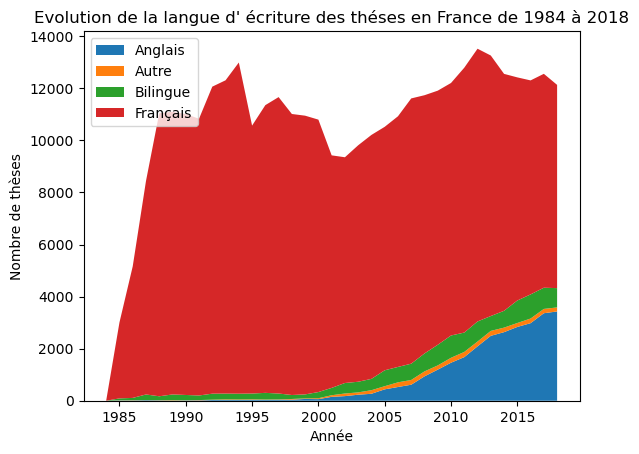

In [48]:
#Creeons la visualisation

plt.stackplot(g.index, g["Anglais"], g["Autre"], g["Bilingue"], g["Français"], labels=["Anglais", "Autre", "Bilingue", "Français"])
plt.legend(loc="upper left")
plt.title("Evolution de la langue d' écriture des théses en France de 1984 à 2018")
plt.xlabel('Année')
plt.ylabel('Nombre de thèses')

plt.show()